In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from keras.metrics import categorical_accuracy
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv(r"D:/Datasets/bank-additional/bank-additional/bank-additional-full.csv", sep = ';') #reads csv files and storees in pandas arrarys
df.head() #to display 5 rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()   # displays info about csv file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
def one_hot_encode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [6]:
Features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

Target = ['y']

X = df[Features] ; Y = df[Target]
x_train, x_test, y_train, y_test = train_test_split(X ,Y , test_size = 0.30,random_state = 42)

#one hot encode
y_train = np.asarray(one_hot_encode(y_train,['y']))
y_test = np.asarray(one_hot_encode(y_test,['y']))

x_train = np.asarray(one_hot_encode(x_train,Features))
x_test = np.asarray(one_hot_encode(x_test,Features))



In [7]:
colnum = x_train.shape[1]


model = Sequential()
model.add(Dense(150, activation='relu', input_shape=(colnum,)))
model.add(Dense(100, activation='relu', input_shape=(colnum,)))
model.add(Dense(50, activation='relu', input_shape=(colnum,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=10)
score = model.evaluate(x_test, y_test, verbose=0)*100
score[1]

Epoch 1/10
28831/28831 [==============================] - 3s 91us/step - loss: 1.8175 - acc: 0.8872
Epoch 2/10
28831/28831 [==============================] - 2s 86us/step - loss: 1.8175 - acc: 0.8872
Epoch 3/10
28831/28831 [==============================] - 2s 73us/step - loss: 1.8175 - acc: 0.8872
Epoch 4/10
28831/28831 [==============================] - 2s 77us/step - loss: 1.8175 - acc: 0.8872
Epoch 5/10
28831/28831 [==============================] - 2s 76us/step - loss: 1.8175 - acc: 0.8872
Epoch 6/10
28831/28831 [==============================] - 2s 80us/step - loss: 1.8175 - acc: 0.8872: 0s - loss: 1.7976 - 
Epoch 7/10
28831/28831 [==============================] - 2s 71us/step - loss: 1.8175 - acc: 0.8872
Epoch 8/10
28831/28831 [==============================] - 2s 72us/step - loss: 1.8175 - acc: 0.8872
Epoch 9/10
28831/28831 [==============================] - 2s 81us/step - loss: 1.8175 - acc: 0.8872
Epoch 10/10
28831/28831 [==============================] - 2s 77us/step - loss

0.8875940762320952

In [9]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
28831/28831 [==============================] - 2s 74us/step - loss: 1.8175 - acc: 0.8872
Epoch 2/10
28831/28831 [==============================] - 2s 71us/step - loss: 1.8175 - acc: 0.8872
Epoch 3/10
28831/28831 [==============================] - 2s 77us/step - loss: 1.8175 - acc: 0.8872: 1s - loss: 1
Epoch 4/10
28831/28831 [==============================] - 2s 71us/step - loss: 1.8175 - acc: 0.8872
Epoch 5/10
28831/28831 [==============================] - 2s 78us/step - loss: 1.8175 - acc: 0.8872
Epoch 6/10
28831/28831 [==============================] - 2s 75us/step - loss: 1.8175 - acc: 0.8872
Epoch 7/10
28831/28831 [==============================] - 3s 89us/step - loss: 1.8175 - acc: 0.8872: 0s - loss: 1.8088 - ac
Epoch 8/10
28831/28831 [==============================] - 2s 74us/step - loss: 1.8175 - acc: 0.8872
Epoch 9/10
28831/28831 [==============================] - 2s 70us/step - loss: 1.8175 - acc: 0.8872
Epoch 10/10
28831/28831 [==============================] - 2s 

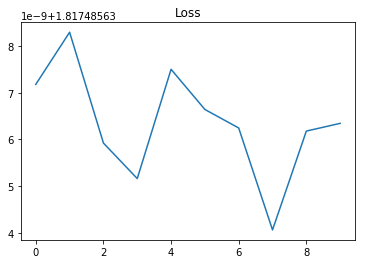

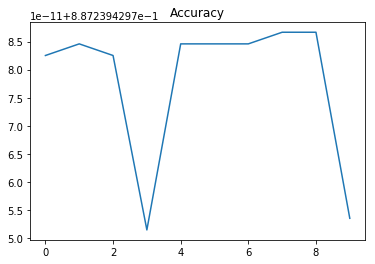

In [10]:
plt.plot(np.arange(0,len(history.history['loss'])), history.history['loss'])
plt.title("Loss")
plt.show()
plt.plot(np.arange(0,len(history.history['acc'])), history.history['acc'])
plt.title("Accuracy")
plt.show()

NameError: name 'fig' is not defined

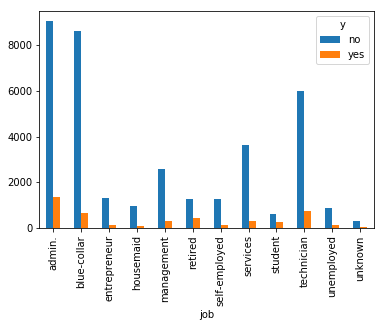

In [23]:
pivot = df.pivot_table(index=['job'], columns='y',values='age', aggfunc='count')
pivot.plot(kind='bar')
plt.setp(fig.get_xticklabels(), visible=True) 
plt.xticks(np.arange(len(pivot.index)), pivot.index)
plt.show()
pivot = df.pivot_table(index=['contact'], columns='y',values='age', aggfunc='count')
pivot.plot(kind='bar')
plt.setp(fig.get_xticklabels(), visible=True) 
plt.xticks(np.arange(len(pivot.index)), pivot.index)
plt.show()
pivot = df.pivot_table(index=['month'], columns='y',values='age', aggfunc='count')
pivot.plot(kind='bar')
plt.setp(fig.get_xticklabels(), visible=True) 
plt.xticks(np.arange(len(pivot.index)), pivot.index)
plt.show()
pivot = df.pivot_table(index=['day'], columns='y',values='age', aggfunc='count')
pivot.plot(kind='bar')
plt.setp(fig.get_xticklabels(), visible=True) 
plt.xticks(np.arange(len(pivot.index)), pivot.index)
plt.show()

In [74]:
random_subset = df.sample(n=2000)
random_subset.head()
random_subset['y']
y = np.asarray(one_hot_encode(random_subset,['y']))
y[:,-1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
random_subset.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
34521,34,entrepreneur,married,high.school,no,yes,yes,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
37907,39,entrepreneur,married,basic.6y,no,no,no,cellular,sep,tue,...,4,16,2,failure,-3.4,92.379,-29.8,0.819,5017.5,no
13303,31,admin.,single,high.school,no,no,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
13665,33,self-employed,married,basic.9y,unknown,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
26913,29,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no


In [76]:
Features_pred = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

pred_x = random_subset[Features] 


#one hot encode
x_pred = np.asarray(one_hot_encode(pred_x,Features))

pred_y = model.predict(x_pred)

(28831, 63)